# Starting your new restaurant in Mumbai

## Introduction

As one of the big financial hub of the world, Mumbai represents one of the most densely populated cities in the globe. As multi-cultural city, Mumbai attract so many people for either working or enjoying their holidays. For most of the times any person will find some difficulties in finding some of his preferable cuisines.
Thus, the aim of this project is to study the Mumbai neighborhoods in order to determine suitable locations for new restaurant. This project can be useful for business owners and entrepreneurs who are looking to invest in a restaurant in Mumbai. 
Through the project, a recommendation detailed plan will be presented in order to facilitate the choice of the stakeholder.

### Importing  libraries

In [1]:
!pip install geopy
!pip install geocoder
!pip install folium

import numpy as np
import pandas as pd
import json
from geopy.geocoders import Nominatim
import geocoder
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
from sklearn.metrics import silhouette_score




!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

%matplotlib notebook

print('All libraries imported.')

     |████████████████████████████████| 98 kB 941 kB/s eta 0:00:01
     |████████████████████████████████| 93 kB 3.7 MB/s  eta 0:00:01
     |████████████████████████████████| 79 kB 8.5 MB/s  eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=40a7bfdc817f82c10fe627afebe079e38ed4e965cb7a237fc5fc2d60b26eb1d0
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
  Attempting uninstall: folium
    Found existing installation: folium 0.11.0
    Uninstalling folium-0.11.0:
      Successfully uninstalled folium-0.11.0
Folium installed
Libraries imported.
All libraries imported.


### Data Retrieval

Scraping data from https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai and reading it into a dataframe.

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai')[-1]
df.rename(columns={'Area': 'Neighborhood'}, inplace=True)
df.head(10)

,Neighborhood,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270
5,Marol,"Andheri,Western Suburbs",19.119219,72.882743
6,Sahar,"Andheri,Western Suburbs",19.098889,72.867222
7,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018
8,Versova,"Andheri,Western Suburbs",19.120000,72.820000
9,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111


### Data Wrangling

Lets look at the different values for Location present in the Location column.

In [3]:
df['Location'].value_counts()

South Mumbai                       30
Andheri,Western Suburbs             8
Western Suburbs                     6
Eastern Suburbs                     4
Ghatkopar,Eastern Suburbs           3
Bandra,Western Suburbs              3
Kandivali West,Western Suburbs      3
Mira-Bhayandar,Western Suburbs      3
Powai,Eastern Suburbs               3
Khar,Western Suburbs                2
Borivali (West),Western Suburbs     2
Kalbadevi,South Mumbai              2
Vasai,Western Suburbs               2
Mumbai                              2
Malad,Western Suburbs               2
Harbour Suburbs                     2
Goregaon,Western Suburbs            2
Kurla,Eastern Suburbs               1
Sanctacruz,Western Suburbs          1
Mulund,Eastern Suburbs              1
Dadar,South Mumbai                  1
Govandi,Harbour Suburbs             1
Tardeo,South Mumbai                 1
Colaba,South Mumbai                 1
Trombay,Harbour Suburbs             1
Antop Hill,South Mumbai             1
Kandivali Ea

Depending on the location, we can notice that 90% of the locations includ less than 3 types of restaurants.

In [4]:
df['Location'] = df['Location'].apply(lambda x: x.split(',')[-1])
df.head(10)

,Neighborhood,Location,Latitude,Longitude
0,Amboli,Western Suburbs,19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,Western Suburbs,19.124085,72.831373
3,Four Bungalows,Western Suburbs,19.124714,72.827210
4,Lokhandwala,Western Suburbs,19.130815,72.829270
5,Marol,Western Suburbs,19.119219,72.882743
6,Sahar,Western Suburbs,19.098889,72.867222
7,Seven Bungalows,Western Suburbs,19.129052,72.817018
8,Versova,Western Suburbs,19.120000,72.820000
9,Mira Road,Western Suburbs,19.284167,72.871111


Now lets again look at the values in Location column.

In [5]:
df['Location'].value_counts()

South Mumbai       39
Western Suburbs    36
Eastern Suburbs    12
Harbour Suburbs     4
Mumbai              2
Name: Location, dtype: int64

Now that the data is much easier to interpret, lets display the dataframe created.

In [6]:
df

,Neighborhood,Location,Latitude,Longitude
0,Amboli,Western Suburbs,19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,Western Suburbs,19.124085,72.831373
3,Four Bungalows,Western Suburbs,19.124714,72.827210
4,Lokhandwala,Western Suburbs,19.130815,72.829270
...,...,...,...,...
88,Parel,South Mumbai,18.990000,72.840000
89,Gowalia Tank,South Mumbai,18.962450,72.809703
90,Dava Bazaar,South Mumbai,18.946882,72.831362
91,Dharavi,Mumbai,19.040208,72.850850


### Data Visualization

To understand our data better, we can see how many neighborhoods are in each location.

In [8]:
neighborhoods_mumbai = df.groupby('Location')['Neighborhood'].nunique()
neighborhoods_mumbai

Location
Eastern Suburbs    12
Harbour Suburbs     4
Mumbai              2
South Mumbai       39
Western Suburbs    36
Name: Neighborhood, dtype: int64

We can now plot this data.

<IPython.core.display.Javascript object>


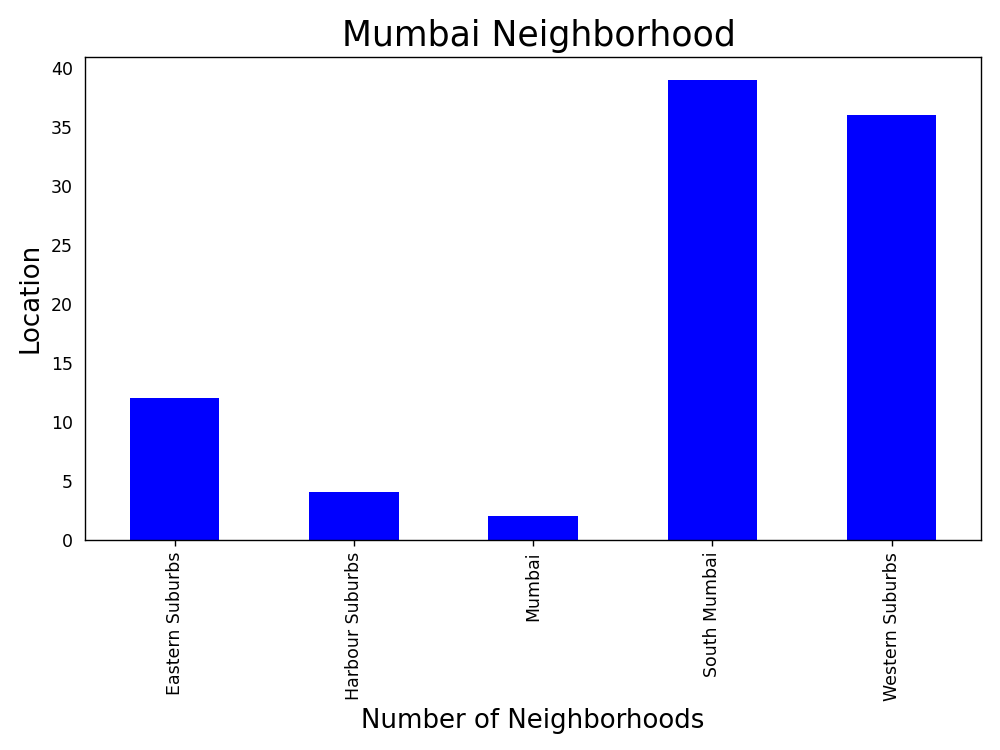

In [46]:
fig = plt.figure(figsize=(8,6))

ax = neighborhoods_mumbai.plot(kind='bar', color='Blue')
ax.set_title(' Mumbai Neighborhood', fontsize=20)
ax.set_xlabel('Number of Neighborhoods', fontsize=15)
ax.set_ylabel('Location', fontsize=15)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.tick_params(which='major', left=False)

fig.tight_layout()

### Using Foursquare API

Now we can start working with the Foursquare API to obtain venue recommendations.

Lets create the Foursquare credentials first.

In [11]:
address = 'Mumbai, IN'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Mumbai are {}, {}.'.format(latitude, longitude))

ConfigurationError: Using Nominatim with default or sample `user_agent` "geopy/2.0.0" is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`.

In [12]:
CLIENT_ID = '4YZLMR1A2GOEWDGDJKAHU0Q0Z2QFXA4NLIY4O0ALLIAV0SOZ' # my Foursquare ID
CLIENT_SECRET = 'K5UTC05YMYA03CVPRGXTYCSWSM203NGRI41U1ABM3ABOII1B' # my Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: '+CLIENT_ID)
print('CLIENT_SECRET: '+CLIENT_SECRET)


Your credentails:
CLIENT_ID: 4YZLMR1A2GOEWDGDJKAHU0Q0Z2QFXA4NLIY4O0ALLIAV0SOZ
CLIENT_SECRET: K5UTC05YMYA03CVPRGXTYCSWSM203NGRI41U1ABM3ABOII1B


We will now extract the top 200 venues near Amboli with a radius of 1000m or 1km. In order to do this, we will start by creating a url.

In [14]:
LIMIT = 200
radius = 1000

url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,neighborhood_lat,neighborhood_long,radius,LIMIT)

url

'https://api.foursquare.com/v2/venues/search?&client_id=4YZLMR1A2GOEWDGDJKAHU0Q0Z2QFXA4NLIY4O0ALLIAV0SOZ&client_secret=K5UTC05YMYA03CVPRGXTYCSWSM203NGRI41U1ABM3ABOII1B&v=20180604&ll=19.1293,72.8434&radius=1000&limit=200'

We can now use the GET method to get our results.

In [15]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fd4f640de2faf58f287fbaa'},
 'response': {'venues': [{'id': '4de0c11cd164e323c7b40a29',
    'name': 'Gelato Italiano',
    'location': {'address': 'Amboli main road, Near Coffee Day.',
     'crossStreet': 'Andheri West',
     'lat': 19.128120193094414,
     'lng': 72.844154207953,
     'labeledLatLngs': [{'label': 'display',
       'lat': 19.128120193094414,
       'lng': 72.844154207953}],
     'distance': 153,
     'cc': 'IN',
     'city': 'Mumbai',
     'state': 'Mahārāshtra',
     'country': 'India',
     'formattedAddress': ['Amboli main road, Near Coffee Day. (Andheri West)',
      'Mumbai',
      'Mahārāshtra',
      'India']},
    'categories': [{'id': '4bf58dd8d48988d1c9941735',
      'name': 'Ice Cream Shop',
      'pluralName': 'Ice Cream Shops',
      'shortName': 'Ice Cream',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/icecream_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-160779219

We will now create a function get_category_type to extract the categories of venues.

In [47]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we can clean the JSON obtained using the GET method and store our results in a dataframe.

In [48]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

KeyError: 'groups'

We can check how many venues were returned by Foursquare.

In [49]:
print("{} venues were returned for {} by Foursquare".format(len(nearby_venues), neighborhood_name))

NameError: name 'nearby_venues' is not defined

### Generalizing Foursquare API

Now that we have seen how the API call works and how we can clean our data to get relevant information, we can generalize this procedure to get nearby venues for all neighborhoods by creating the function getNearbyVenues.

In [50]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

We can apply the function created to get nearby venues for all neighborhoods in Mumbai. We will get 200 nearby venues within a 1km radius, same as before.

In [51]:
Mumbai_V = getNearbyVenues(names=df['Neighborhood'], latitudes=df['Latitude'], longitudes=df['Longitude'], radius=radius)

Amboli
Chakala, Andheri
D.N. Nagar
Four Bungalows
Lokhandwala
Marol
Sahar
Seven Bungalows
Versova
Mira Road
Bhayandar
Uttan
Bandstand Promenade
Kherwadi
Pali Hill
I.C. Colony
Gorai
Dahisa
Aarey Milk Colony
Bangur Nagar
Jogeshwari West
Juhu
Charkop
Poisar
Mahavir Nagar
Thakur village
Pali Naka
Khar Danda
Dindoshi
Sunder Nagar
Kalina
Naigaon
Nalasopara
Virar
Irla
Vile Parle
Bhandup
Amrut Nagar
Asalfa
Pant Nagar
Kanjurmarg
Nehru Nagar
Nahur
Chandivali
Hiranandani Gardens
Indian Institute of Technology Bombay campus
Vidyavihar
Vikhroli
Chembur
Deonar
Mankhurd
Mahul
Agripada
Altamount Road
Bhuleshwar
Breach Candy
Carmichael Road
Cavel
Churchgate
Cotton Green
Cuffe Parade
Cumbala Hill
Currey Road
Dhobitalao
Dongri
Kala Ghoda
Kemps Corner
Lower Parel
Mahalaxmi
Mahim
Malabar Hill
Marine Drive
Marine Lines
Mumbai Central
Nariman Point
Prabhadevi
Sion
Walkeshwar
Worli
C.G.S. colony
Dagdi Chawl
Navy Nagar
Hindu colony
Ballard Estate
Chira Bazaar
Fanas Wadi
Chor Bazaar
Matunga
Parel
Gowalia Tank
D

Below our DF named Mumbai_V

In [52]:
print(Mumbai_V.shape)
Mumbai_V.head(10)

(3622, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Amboli,19.1293,72.8434,Shawarma Factory,19.124591,72.840398,Falafel Restaurant
1,Amboli,19.1293,72.8434,Jaffer Bhai's Delhi Darbar,19.137714,72.845909,Mughlai Restaurant
2,Amboli,19.1293,72.8434,Cafe Arfa,19.128930,72.847140,Indian Restaurant
3,Amboli,19.1293,72.8434,"5 Spice , Bandra",19.130421,72.847206,Chinese Restaurant
4,Amboli,19.1293,72.8434,Pizza Express,19.131893,72.834668,Pizza Place
5,Amboli,19.1293,72.8434,Courtyard Restaurant & Bar,19.131692,72.837269,Asian Restaurant
6,Amboli,19.1293,72.8434,Garden Court,19.127188,72.837478,Indian Restaurant
7,Amboli,19.1293,72.8434,Road House Bluez,19.127251,72.836045,Pub
8,Amboli,19.1293,72.8434,Shetty's Corner,19.124845,72.837858,Chinese Restaurant
9,Amboli,19.1293,72.8434,Persia Darbar,19.136952,72.846822,Indian Restaurant


Lets see how many venues were returned for each neighborhood.

In [53]:
Mumbai_V.groupby('Neighborhood', as_index=False).count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aarey Milk Colony,8,8,8,8,8,8
1,Agripada,23,23,23,23,23,23
2,Altamount Road,85,85,85,85,85,85
3,Amboli,33,33,33,33,33,33
4,Amrut Nagar,51,51,51,51,51,51
...,...,...,...,...,...,...,...
85,Vikhroli,5,5,5,5,5,5
86,Vile Parle,77,77,77,77,77,77
87,Virar,7,7,7,7,7,7
88,Walkeshwar,11,11,11,11,11,11


We can now check how many unique categories are there in our data.

In [54]:
print("There are {} unique categories".format(Mumbai_V['Venue Category'].nunique()))

There are 220 unique categories


### Analyzing each neighborhood

Now we will concentrate more on analyzing all the restaurant related categories

In [55]:
MumbaiNeighb = pd.get_dummies(Mumbai_V[['Venue Category']], prefix="", prefix_sep="")
MumbaiNeighb.head()

,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,...,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Adding Neighborhood column to the one-hot encoded dataframe.

In [56]:
MumbaiNeighb['Neighborhood'] = Mumbai_V['Neighborhood']
MumbaiNeighb.head()

,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,...,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Moving the Neighborhood column to the first column.

In [57]:
temp = list(MumbaiNeighb.columns)

if 'Neighborhood' in temp:
    temp.remove('Neighborhood')
    
fixed_columns = ['Neighborhood'] + temp
MumbaiNeighb = MumbaiNeighb[fixed_columns]

MumbaiNeighb.head()

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,...,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we can groupby neighborhood and take the mean for all categories.

In [58]:
mum_grouped = MumbaiNeighb.groupby('Neighborhood', sort=False).mean().reset_index()
print(mum_grouped.shape)
mum_grouped.head(10)

(90, 220)


,Neighborhood,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,...,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Amboli,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.030303,0.0,0.0,0.0,0.000000,0.0,0.0
1,"Chakala, Andheri",0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.050000,0.0,0.0,0.0,0.000000,0.0,0.0
2,D.N. Nagar,0.0,0.019608,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.019608,0.0,0.0
3,Four Bungalows,0.0,0.021739,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.065217,0.0,0.0,0.0,0.021739,0.0,0.0
4,Lokhandwala,0.0,0.010526,0.0,0.000000,0.000000,0.000000,0.000000,0.010526,0.0,...,0.0,0.0,0.0,0.021053,0.0,0.0,0.0,0.010526,0.0,0.0
5,Marol,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
6,Sahar,0.0,0.000000,0.0,0.035088,0.070175,0.052632,0.052632,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
7,Seven Bungalows,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.036364,0.0,0.0,0.0,0.000000,0.0,0.0
8,Versova,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.032258,0.0,0.0,0.0,0.000000,0.0,0.0
9,Mira Road,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.035714,0.0,0.0,0.0,0.000000,0.0,0.0


In order to further understand the data, we can display the least 10 venues of all neighborhoods.

In [69]:
num_top_venues = 10

for hood in mum_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = mum_grouped[mum_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=True).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Amboli----
                        venue  freq
0                         ATM   0.0
1    Maharashtrian Restaurant   0.0
2                      Market   0.0
3    Mediterranean Restaurant   0.0
4                 Men's Store   0.0
5          Mexican Restaurant   0.0
6   Middle Eastern Restaurant   0.0
7          Miscellaneous Shop   0.0
8           Mobile Phone Shop   0.0
9  Modern European Restaurant   0.0


----Chakala, Andheri----
                        venue  freq
0                         ATM   0.0
1                      Market   0.0
2    Mediterranean Restaurant   0.0
3                 Men's Store   0.0
4               Metro Station   0.0
5          Mexican Restaurant   0.0
6   Middle Eastern Restaurant   0.0
7          Miscellaneous Shop   0.0
8           Mobile Phone Shop   0.0
9  Modern European Restaurant   0.0


----D.N. Nagar----
                        venue  freq
0                         ATM   0.0
1    Maharashtrian Restaurant   0.0
2    Mediterranean Restaurant   0.0
3

                       venue  freq
0                        ATM   0.0
1                 Lighthouse   0.0
2               Liquor Store   0.0
3   Maharashtrian Restaurant   0.0
4                     Market   0.0
5   Mediterranean Restaurant   0.0
6                Men's Store   0.0
7         Mexican Restaurant   0.0
8  Middle Eastern Restaurant   0.0
9         Miscellaneous Shop   0.0


----Dindoshi----
                             venue  freq
0                              ATM   0.0
1                           Market   0.0
2         Mediterranean Restaurant   0.0
3                      Men's Store   0.0
4                    Metro Station   0.0
5               Mexican Restaurant   0.0
6               Miscellaneous Shop   0.0
7                Mobile Phone Shop   0.0
8       Modern European Restaurant   0.0
9  Molecular Gastronomy Restaurant   0.0


----Sunder Nagar----
                      venue  freq
0                       ATM   0.0
1              Liquor Store   0.0
2  Maharashtrian Res

                             venue  freq
0                              ATM   0.0
1         Maharashtrian Restaurant   0.0
2         Mediterranean Restaurant   0.0
3                      Men's Store   0.0
4                    Metro Station   0.0
5               Miscellaneous Shop   0.0
6                Mobile Phone Shop   0.0
7       Modern European Restaurant   0.0
8  Molecular Gastronomy Restaurant   0.0
9              Monument / Landmark   0.0


----Churchgate----
                       venue  freq
0                        ATM   0.0
1                 Lighthouse   0.0
2               Liquor Store   0.0
3   Maharashtrian Restaurant   0.0
4                     Market   0.0
5                Men's Store   0.0
6              Metro Station   0.0
7         Mexican Restaurant   0.0
8  Middle Eastern Restaurant   0.0
9         Miscellaneous Shop   0.0


----Cotton Green----
                        venue  freq
0                         ATM   0.0
1                      Market   0.0
2    Mediter

                             venue  freq
0                              ATM   0.0
1                    Metro Station   0.0
2               Mexican Restaurant   0.0
3        Middle Eastern Restaurant   0.0
4               Miscellaneous Shop   0.0
5                Mobile Phone Shop   0.0
6       Modern European Restaurant   0.0
7  Molecular Gastronomy Restaurant   0.0
8              Monument / Landmark   0.0
9                    Movie Theater   0.0


----Chor Bazaar----
                             venue  freq
0                              ATM   0.0
1                           Market   0.0
2         Mediterranean Restaurant   0.0
3                      Men's Store   0.0
4                    Metro Station   0.0
5               Mexican Restaurant   0.0
6               Miscellaneous Shop   0.0
7                Mobile Phone Shop   0.0
8       Modern European Restaurant   0.0
9  Molecular Gastronomy Restaurant   0.0


----Matunga----
                             venue  freq
0                

Lets now create a dataframe with the top 10 common venues for each neighborhood.

In [60]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [61]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mum_grouped['Neighborhood']

for ind in np.arange(mum_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mum_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,Indian Restaurant,Bar,Pizza Place,Asian Restaurant,Coffee Shop,Pub,Chinese Restaurant,Snack Place,Burger Joint,Bakery
1,"Chakala, Andheri",Hotel,Indian Restaurant,Café,Seafood Restaurant,Fast Food Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Multiplex,Pizza Place
2,D.N. Nagar,Bar,Pizza Place,Vegetarian / Vegan Restaurant,Pub,Gym / Fitness Center,Lounge,Coffee Shop,Indian Restaurant,Snack Place,Japanese Restaurant
3,Four Bungalows,Indian Restaurant,Pub,Coffee Shop,Lounge,Bar,Café,Vegetarian / Vegan Restaurant,Gym / Fitness Center,Pizza Place,Department Store
4,Lokhandwala,Bar,Pub,Coffee Shop,Indian Restaurant,Pizza Place,Lounge,Asian Restaurant,Café,Italian Restaurant,Multiplex
...,...,...,...,...,...,...,...,...,...,...,...
85,Parel,Plaza,Indian Restaurant,Multiplex,Fast Food Restaurant,Roof Deck,Restaurant,Bar,Bakery,Maharashtrian Restaurant,Hotel
86,Gowalia Tank,Indian Restaurant,Bakery,Café,Coffee Shop,Fast Food Restaurant,Sandwich Place,Snack Place,Theater,Electronics Store,Bank
87,Dava Bazaar,Indian Restaurant,Café,Coffee Shop,Bar,Fast Food Restaurant,Chinese Restaurant,Bakery,Multiplex,Train Station,Convenience Store
88,Dharavi,Indian Restaurant,Bakery,Fast Food Restaurant,Coffee Shop,Pizza Place,Breakfast Spot,Restaurant,Gym,Dance Studio,Ice Cream Shop


Throughout the recent analysis we had discovered top 10 and least 10 existing restaurant types which aims to identify the newest to be considered in specific areas

## Results and Discussion

Going through the provided listing investors would be able to retrieve the information required to select a specific restaurant type for specific area.
The proposed solution would present a data driven solution for any investor or stakeholder to start his own business or to change his own to a new one. 

## Conclusion

We have successfully analyzed the neighborhoods in Mumbai, India for determining which would be the best neighborhoods for opening a new restaurant. The stakeholders and investors can further tune this by considering various other factors like transport and especially the 




# Thank You!